In [1]:
import pandas_profiling 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

np.random.seed(546)

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style("dark")


from sklearn.ensemble import RandomForestClassifier 
from sklearn import tree
from sklearn.tree import export_graphviz 
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import eli5 
from eli5.sklearn import PermutationImportance

APRESENTANDO A NOSSA BASE DE DADOS:

Nossa base de dados nos traz diagnósticos de câncer de mama no estado  do Wiscosin(EUA), nela podemos observar algumas características interessantes a partir das imagens digitalizadas de células extraídas de tecidos mamários pelo procedimento chamado PAAF. Assim, podemos nos aprofundar um pouco mais nas características dos núcleos celulares, e buscar entender quais são suas relações com células cancerígenas.

- ID trata-se do parâmetro de identificação
- Diagnosis trata-se do diagnóstico do tecido, sendo ele Benigno ou Maligno

Sufixos:

*_mean: Média padrão


*_se: Margem de erro


*_worst: Mais alto valor encontrado

---------- DETALHES-----------

Raio: 

- Oferece a noção da dimensão do tumor, isso é essencial para a cirurgia correr bem


Textura:

- Para visualização do tecido em questão e baseado na escala de cinza é utilizada para encontrar o tumor. 
(Associado à ultrassonografia)

In [2]:
#Criando nossa base de dados

bcdf = pd.read_csv('cancer_de_mama.csv')


## Criando uma cópia, caso seja necessário manter alguma das bases no estado original

bcdf_1 = bcdf.copy()

bcdf

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
bcdf.rename(columns={'concave points_mean':'concave_points_mean'},inplace=True)
bcdf = bcdf.drop('Unnamed: 32', axis=1)

In [4]:
## Transformando variável categórica do diagnóstico em valores matemáticos
## No caso, os tecidos malignos são representados pelo número 1, e os benignos pelo número 0


bcdf['diagnosis'][bcdf['diagnosis']=='M'] = 1
bcdf['diagnosis'][bcdf['diagnosis']=='B'] = 0


C:\Users\João Vitor\AppData\Local\Temp\ipykernel_5412\357246317.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bcdf['diagnosis'][bcdf['diagnosis']=='M'] = 1
C:\Users\João Vitor\AppData\Local\Temp\ipykernel_5412\357246317.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bcdf['diagnosis'][bcdf['diagnosis']=='B'] = 0


In [5]:
bcdf['diagnosis'] = bcdf['diagnosis'].astype('int')

Uma vez com as visualizações das interações sobre as características do tecido e sua correlação com a incidência de tumores maligonos e benignos, cabe realizarmos, agora, modelos de predição.



 - Preparando os processos para a nossos modelos de predição:

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

x= bcdf.copy()
x = x.drop('id',axis=1)
x = x.drop('diagnosis', axis=1)

y = bcdf['diagnosis']

X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state=42) 

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(mc_l, X_treino, y_treino, X_teste, y_teste, train=True):
    if train:
        pred = mc_l.predict(X_treino)
        clf_report = pd.DataFrame(classification_report(y_treino, pred, output_dict=True))
        print("Resultado do treino: \n ================================================")
        print(f"Precisão: {accuracy_score(y_treino, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classificação:\n{clf_report}")
        print("_______________________________________________")
        print(f"Matriz de Confusão: \n {confusion_matrix(y_treino, pred)}\n")
        
    elif train==False:
        pred = mc_l.predict(X_teste)
        clf_report = pd.DataFrame(classification_report(y_teste, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Precisão: {accuracy_score(y_teste, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classificação:\n{clf_report}")
        print("_______________________________________________")
        print(f"Matriz de Confusão: \n {confusion_matrix(y_teste, pred)}\n")

Regressão Linear:

In [8]:
from sklearn.linear_model import LogisticRegression

rg1 = LogisticRegression(solver='liblinear')
rg1.fit(X_treino, y_treino)


print_score(rg1, X_treino, y_treino, X_teste, y_teste, train=True)
print_score(rg1, X_treino, y_treino, X_teste, y_teste, train=False)


Resultado do treino: 
Precisão: 95.23%
_______________________________________________
Classificação:
                    0           1  accuracy   macro avg  weighted avg
precision    0.952756    0.951389  0.952261    0.952072      0.952244
recall       0.971888    0.919463  0.952261    0.945675      0.952261
f1-score     0.962227    0.935154  0.952261    0.948690      0.952091
support    249.000000  149.000000  0.952261  398.000000    398.000000
_______________________________________________
Matriz de Confusão: 
 [[242   7]
 [ 12 137]]

Test Result:
Precisão: 96.49%
_______________________________________________
Classificação:
                    0          1  accuracy   macro avg  weighted avg
precision    0.963636   0.967213  0.964912    0.965425      0.964954
recall       0.981481   0.936508  0.964912    0.958995      0.964912
f1-score     0.972477   0.951613  0.964912    0.962045      0.964790
support    108.000000  63.000000  0.964912  171.000000    171.000000
________________

In [9]:
tst1= accuracy_score(y_teste, rg1.predict(X_teste))*100
trng1 = accuracy_score(y_treino, rg1.predict(X_treino))*100

resultado_regress = pd.DataFrame(data=[['Regressão Linear', trng1, tst1]], columns = ['Modelo', 'Precisão treinamento %', 'Precisão de testagem%'])

resultado_regress

,Modelo,Precisão treinamento %,Precisão de testagem%
0,Regressão Linear,95.226131,96.491228


KNN:

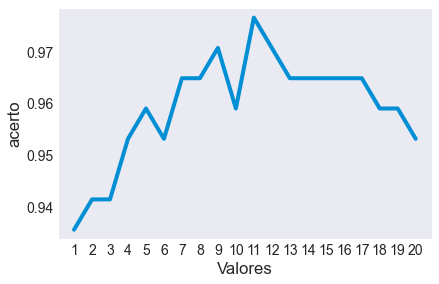

In [10]:
## KNN

from sklearn.neighbors import KNeighborsClassifier

### Vamos verificar o melhor valor de N para um resultado mais preciso

knn_ideal_lista = []  


for x in range (1,21):
    knn_ideal = KNeighborsClassifier(n_neighbors= x)
    knn_ideal.fit(X_treino,y_treino)
    knn_ideal_lista.append(knn_ideal.score(X_teste,y_teste))



plt.plot(range(1,21), knn_ideal_lista)
plt.xticks(np.arange(1,21,1))
plt.xlabel("Valores")
plt.ylabel("acerto")
plt.show()

In [11]:
knn_1 = KNeighborsClassifier(n_neighbors=11)
knn_1.fit(X_treino, y_treino)

print_score(knn_1, X_treino, y_treino, X_teste, y_teste, train=True)
print_score(knn_1, X_treino, y_treino, X_teste, y_teste, train=False)

Resultado do treino: 
Precisão: 92.21%
_______________________________________________
Classificação:
                    0           1  accuracy   macro avg  weighted avg
precision    0.909774    0.946970  0.922111    0.928372      0.923699
recall       0.971888    0.838926  0.922111    0.905407      0.922111
f1-score     0.939806    0.889680  0.922111    0.914743      0.921040
support    249.000000  149.000000  0.922111  398.000000    398.000000
_______________________________________________
Matriz de Confusão: 
 [[242   7]
 [ 24 125]]

Test Result:
Precisão: 97.66%
_______________________________________________
Classificação:
                    0          1  accuracy   macro avg  weighted avg
precision    0.972727   0.983607  0.976608    0.978167      0.976735
recall       0.990741   0.952381  0.976608    0.971561      0.976608
f1-score     0.981651   0.967742  0.976608    0.974697      0.976527
support    108.000000  63.000000  0.976608  171.000000    171.000000
________________

In [12]:
tst2= accuracy_score(y_teste, knn_1.predict(X_teste))*100
trng2 = accuracy_score(y_treino, knn_1.predict(X_treino))*100

resultado_KNN = pd.DataFrame(data=[['KNN', trng2, tst2]], columns = ['Modelo', 'Precisão treinamento %', 'Precisão de testagem%'])

resultado_KNN

,Modelo,Precisão treinamento %,Precisão de testagem%
0,KNN,92.211055,97.660819


RANDOM FOREST:

In [13]:
rndf1 = RandomForestClassifier(n_estimators=456)
rndf1.fit(X_treino, y_treino)


print_score(rndf1, X_treino, y_treino, X_teste, y_teste, train=True)
print_score(rndf1, X_treino, y_treino, X_teste, y_teste, train=False)


Resultado do treino: 
Precisão: 100.00%
_______________________________________________
Classificação:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    249.0  149.0       1.0      398.0         398.0
_______________________________________________
Matriz de Confusão: 
 [[249   0]
 [  0 149]]

Test Result:
Precisão: 97.08%
_______________________________________________
Classificação:
                    0          1  accuracy   macro avg  weighted avg
precision    0.963964   0.983333   0.97076    0.973649      0.971100
recall       0.990741   0.936508   0.97076    0.963624      0.970760
f1-score     0.977169   0.959350   0.97076    0.968259      0.970604
support    108.000000  63.000000   0.97076  171.000000    171.000000
_______________________________________________
Matriz de Confusão: 
 

In [14]:
tst3= accuracy_score(y_teste, rndf1.predict(X_teste))*100
trng3 = accuracy_score(y_treino, rndf1.predict(X_treino))*100

resultado_RandomForest = pd.DataFrame(data=[['Random Forest', trng3, tst3]], columns = ['Modelo', 'Precisão treinamento %', 'Precisão de testagem%'])

resultado_RandomForest


,Modelo,Precisão treinamento %,Precisão de testagem%
0,Random Forest,100.0,97.076023


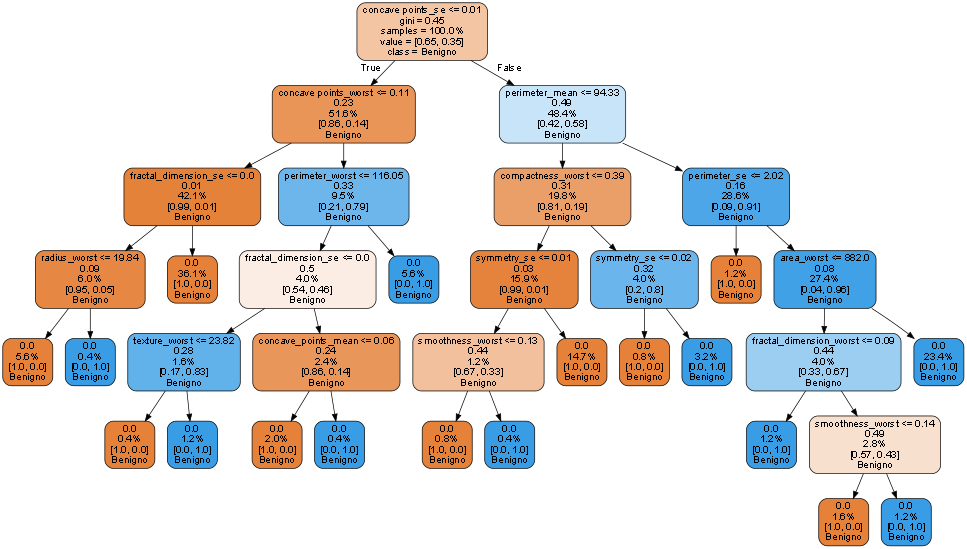

In [15]:
from sklearn.tree import export_graphviz

estimators_rdflst = rndf1.estimators_[1]   
classificacoes = [ z for z in X_treino.columns]

y_treino_str = y_treino.astype('str')
y_treino_str[y_treino_str == '0'] = 'Benigno'
y_treino_str[y_treino_str == '1'] = 'Maligno'
y_treino_str = y_treino_str.values


export_graphviz(estimators_rdflst, out_file='tree.dot', 
                feature_names = classificacoes,
                class_names = y_treino_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=50'])

from IPython.display import Image
Image(filename = 'tree.png')

UTILIZANDO O  KERAS:

Este é o primeiro projeto em que faço uso do Keras. Mas afinal, o que é o Keras?

Trata-se de uma biblioteca voltada ao uso de Redes Neurais e Deep Learning, com ela podemos treinar modelos de Machine Learning com considerável facilidade.



In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_treino = sc.fit_transform(X_treino)
X_teste = sc.transform(X_teste)

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()

In [18]:

## Como o Keras é um sistema baseado no uso de sequências de camadas, essa será a nossa primeira.
## Nesse caso temos no "input_dim" as nossas primeiras entradas, ralizaremos um ajuste para que o número seja de 8 entradas

classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu',  input_dim=30))
## A função ReLu pode ser uma opção interessante, uma vez que em caso de valores negativos
## há o retorno do 0, não ativando todos os neurônios simultaneamente,
## além de ser uma função muito utilizada por ser relativamente simples. 

classifier.add(Dropout(rate=0.15))
## "Em outras palavras, se pensarmos em nossa rede como um modelo que está fazendo previsões,
## então podemos pensar no Dropout como uma forma de garantir que o modelo seja robusto para a perda de qualquer evidência individual."
## Ao mesmo passo que evita o overfitting de nosso classificador, ou seja, torna-o mais simples.


classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))



classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))  ### Queremos apenas uma saída, por isso a função Sigmoide. 

In [19]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
classifier.fit(X_treino, y_treino, batch_size=100, epochs=600)

Epoch 1/600
4/4 [==============================] - 1s 6ms/step - loss: 0.6927 - accuracy: 0.6884
Epoch 2/600
4/4 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.7789
Epoch 3/600
4/4 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.8317
Epoch 4/600
4/4 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.8719
Epoch 5/600
4/4 [==============================] - 0s 4ms/step - loss: 0.6832 - accuracy: 0.9045
Epoch 6/600
4/4 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.9296
Epoch 7/600
4/4 [==============================] - 0s 4ms/step - loss: 0.6705 - accuracy: 0.9322
Epoch 8/600
4/4 [==============================] - 0s 3ms/step - loss: 0.6601 - accuracy: 0.9372
Epoch 9/600
4/4 [==============================] - 0s 4ms/step - loss: 0.6470 - accuracy: 0.9372
Epoch 10/600
4/4 [==============================] - 0s 3ms/step - loss: 0.6306 - accuracy: 0.9347
Epoch 11/600
4/4 [===========

In [21]:
predicao = classifier.predict(X_teste)
predicao = (predicao > 0.5)

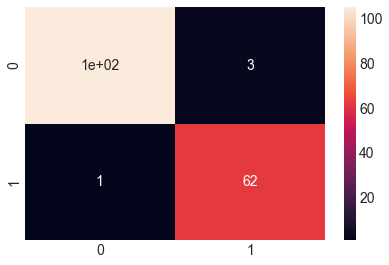

In [22]:

matriz_de_confusao = confusion_matrix(y_teste, predicao)
sns.heatmap(matriz_de_confusao,annot=True)
plt.show()